1. Train Your own Mask R-CNN using Pytorch :) https://www.kaggle.com/abhishek/train-your-own-mask-rcnn

2. Some Medium Posts - https://medium.com/@jonathan_hui/object-detection-series-24d03a12f904

3. Review of Deep Learning Algorithms for Object Detection - https://medium.com/zylapp/review-of-deep-learning-algorithms-for-object-detection-c1f3d437b852

4. Airplanes Detection for Satellite using Faster RCNN - https://towardsdatascience.com/airplanes-detection-for-satellite-using-faster-rcnn-d307d58353f1

5. YOLO object detection with OpenCV and Python - https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9

6. A Practical Guide to Object Detection using the Popular YOLO Framework – Part III (with Python codes) - https://www.analyticsvidhya.com/blog/2018/12/practical-guide-object-detection-yolo-framewor-python/

7. How to implement a YOLO (v3) object detector from scratch in PyTorch: Part 1 - https://blog.paperspace.com/how-to-implement-a-yolo-object-detector-in-pytorch/

8. How to implement a YOLO (v3) object detector from scratch in PyTorch: Part 2 - https://blog.paperspace.com/how-to-implement-a-yolo-v3-object-detector-from-scratch-in-pytorch-part-2/

9. How to implement a YOLO (v3) object detector from scratch in PyTorch: Part 3 - https://blog.paperspace.com/how-to-implement-a-yolo-v3-object-detector-from-scratch-in-pytorch-part-3/

10. How to implement a YOLO (v3) object detector from scratch in PyTorch: Part 4 - https://blog.paperspace.com/how-to-implement-a-yolo-v3-object-detector-from-scratch-in-pytorch-part-4/

11. Autonomous driving - Car detection - https://github.com/enggen/Deep-Learning-Coursera/blob/master/Convolutional%20Neural%20Networks/Week3/Car%20detection%20for%20Autonomous%20Driving/Autonomous%20driving%20application%20-%20Car%20detection%20-%20v1.ipynb

Understanding YOLO - https://hackernoon.com/understanding-yolo-f5a74bbc7967

In [1]:
# Import Important libraries

import os, sys
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten, LeakyReLU
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
path_to_images = '/home/mrityunjay/Documents/Object Detection - Project/dataset/'

labelled_data = pd.read_csv(path_to_images + 'labelled_data.csv')

labelled_data['x'] = (labelled_data['xmax']+labelled_data['xmin'])/2/832
labelled_data['y'] = (labelled_data['ymax']+labelled_data['ymin'])/2/624
labelled_data['w'] = (labelled_data['xmax']-labelled_data['xmin'])/832
labelled_data['h'] = (labelled_data['ymax']-labelled_data['ymin'])/624

In [3]:
data = labelled_data[['filename', 'x', 'y', 'w', 'h', 'class']]
data.head()

,filename,x,y,w,h,class
0,IMG_20190709_075813.jpg,0.759014,0.453526,0.481971,0.490385,car
1,IMG_20190709_075813.jpg,0.419471,0.382212,0.112981,0.177885,bus
2,IMG_20190709_075813.jpg,0.521635,0.387019,0.048077,0.091346,truck
3,IMG_20190709_075813.jpg,0.486779,0.406250,0.028846,0.068910,taxi
4,IMG_20190709_075813.jpg,0.350361,0.427083,0.010817,0.030449,bike


In [6]:
label_dict = {label:i for i,label in enumerate(data['class'].unique())}
print(label_dict)
data['class'] = data['class'].map(label_dict)
data.head()

{'car': 0, 'bus': 1, 'truck': 2, 'taxi': 3, 'bike': 4, 'person': 5, 'cow': 6, 'cycle': 7, 'dog': 8}


/home/mrityunjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,filename,x,y,w,h,class
0,IMG_20190709_075813.jpg,0.759014,0.453526,0.481971,0.490385,0
1,IMG_20190709_075813.jpg,0.419471,0.382212,0.112981,0.177885,1
2,IMG_20190709_075813.jpg,0.521635,0.387019,0.048077,0.091346,2
3,IMG_20190709_075813.jpg,0.486779,0.406250,0.028846,0.068910,3
4,IMG_20190709_075813.jpg,0.350361,0.427083,0.010817,0.030449,4


In [8]:
data['class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

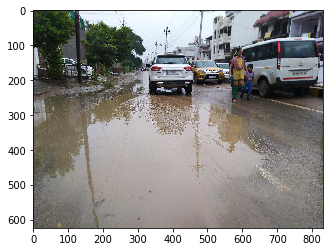

In [16]:
path_to_images = '/home/mrityunjay/Documents/Object Detection - Project/dataset/'
X = {}
for i in range(len(images)):
    img = Image.open(path_to_images + images[i])
    img_arr = np.asarray(img)/255.0
    X[images[i]] = img_arr

plt.imshow(X[images[1]])

In [5]:
no_of_classes = len(labelled_data['class'].unique())
print('Number of Classes : ', no_of_classes)

Number of Classes :  9


## Architecture

<img src = "Screenshot from 2019-07-14 19-12-09.png"/>

### Loss Function

<img src = "math.svg"/>

In [30]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (7,7), padding = 'same', strides = 2, input_shape=(624,832,1)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 192, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 256, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 256, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 256, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 256, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 256, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 512, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 512, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (1,1), padding = 'same'))
model.add(LeakyReLU())

model.add(Conv2D(filters = 1024, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Flatten())
model.add(Dense(4096))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(6859))